#### Проект 2. Разведывательный анализ данных (EDA)*

Исследование влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

Описание датасета:
    
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Предобработка:

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
df = pd.read_csv('stud_math.csv')

# преобразуем форматы времени в минуты 
# новая формулировка звучит как: "время в пути до дома занимает не более, чем".
df.traveltime = df.traveltime.replace(1, 15)
df.traveltime = df.traveltime.replace(2, 30)
df.traveltime = df.traveltime.replace(3, 60)
df.traveltime = df.traveltime.replace(4, 120)

# новая формулировка звучит как: "время на учёбу помимо школы занимает не более, чем"
df.studytime = df.studytime.replace(1, 120)
df.studytime = df.studytime.replace(2, 300)
df.studytime = df.studytime.replace(3, 600)
df.studytime = df.studytime.replace(4, 1200)


# функция построения диаграмм типа коробки с усами
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
from itertools import combinations
from scipy.stats import ttest_ind

# функция расчёта p-value при 90% уровне доверия
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            print('p-value',ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], df.loc[df.loc[:, column] == comb[1], 'score']).pvalue)
            break

#### Начнём с предварительного просмотра загруженных данных

In [46]:
display(df.head(3))
display(df.tail(3))
# видим, что данные имеют пропуски, которые обозначены как NaN

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,...,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


In [47]:
# сверим список колонок с заявленными вводными
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Расшифровка обозначений нам дана только по 29 колонкам, т.е. мы не значем как интерпретировать данные в колонке "studytime, granular"

посмотрим велико ли количество пропусков в предоставленной нам выборке (датасета)

In [48]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
df.info()


school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
Pstatus - 11%
Medu - 1%
Fedu - 6%
Mjob - 5%
Fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
studytime, granular - 2%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mj

Имеем неочень большую выборку из 395 строк, однако со значительным количеством колонок - 30, из которых 13 колонок содержат количественные показатели и 17 - номинативные.

Пропусков данных не много, наименьшее заполнение данными 89% наблюдаем в колонке статуса совместного проживания родителей (Pstatus)

#### Изучим колонку score
Она является наиболее значимой колонкой, поскольку по ней предполагается делать выводы. 
Проверим колонку score на пропуски и недостоверные значения, для этого взглянем на её основные статистические показатели.

In [49]:
df.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

#### Видим важную информацию:
1. Колонка имеет 6 пустых строк, а также нулевые значения. Придётся удалить их, так как заполнить пропуски в основной результирующей колонки недопустимо. 
2. Для оценки скорее всего используется 100-бальная шкала
3. Типичная оценка 55 баллов

Удалим пустые и нулевые строки

In [50]:
df = df.query("score not in [0, 'NaN']")

Посмотрим как изменились общие статистические показатели

In [51]:
df.score.describe()

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

После очистки выборки осталось 89,1% данных - это 352 строки.
Возросло среднее значение и уменьшился разброс итогового балла по математике, медиана без изменений 55 баллов.

#### Изучим колонку school

In [52]:
df.school.value_counts()

GP    311
MS     41
Name: school, dtype: int64

В колонке нет пропусков и у неё всего 2 варианта заполнения. 
Большинство учеников в выборке из одной школы.

<AxesSubplot:xlabel='school'>

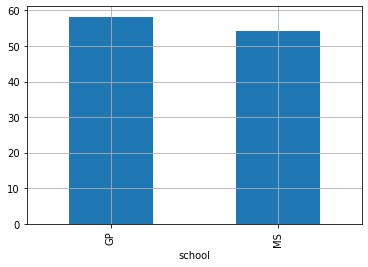

In [53]:
df.groupby(by = ['school'])['score'].mean().plot(kind = 'bar', grid= True)

#### Изучим колонку sex

F    182
M    170
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

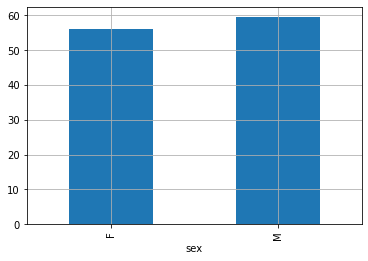

In [54]:
display(df.sex.value_counts())
df.groupby(by = ['sex'])['score'].mean().plot(kind = 'bar', grid= True)

В этой колонке также нет пропусков и у неё всего 2 варианта заполнения. Соотношение мальчиков и девочек в выборке сопоставимо, а вот средний балл мальчиков возможно выше.

#### Изучим колонку age

In [55]:
df.age.describe()

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Все строки имеют данные. 
Подтверждается диапазон возраста учеников от 15 до 22 лет по усовиям выборки.

Посмотрим имеет ли значение возраст ребёнка для выбора школы

score         
school    GP  MS  All
age                  
15        76   0   76
16        96   0   96
17        79  11   90
18        45  24   69
19        13   3   16
20         1   2    3
21         0   1    1
22         1   0    1
All      311  41  352

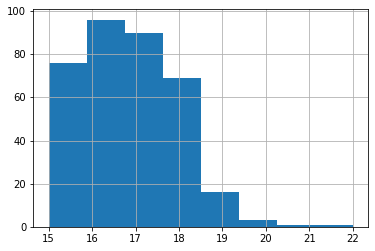

In [56]:
df.age.hist(bins = 8)
pivot = df.pivot_table(values=['score'],
index=['age'],
columns=['school'],
aggfunc='count', 
margins=True,
fill_value=0)
display(pivot)

Распределение детей по возрасту неравномерное, детей в возрасте 15-18 лет существенно больше, чем более взрослых. 

Похоже, что большинство школьников заканчивают обучение примерно в 18 лет, т.к. врядли с возрастом у детей снижается тенденция согласия на принятие участия в подобных опросах.

Похоже, что в школу MS или берут детей только с 17 лет, или (что более вероятно) статистику в этой школе начали собирать недавно и предоставили данные только по одному выпускному классу.

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

<AxesSubplot:xlabel='age'>

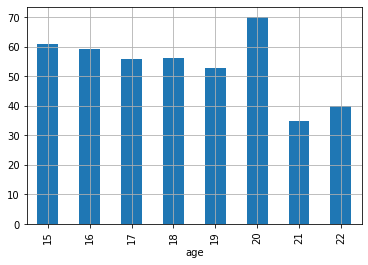

In [57]:
display(df.age.value_counts())
df.groupby(by = ['age'])['score'].mean().plot(kind = 'bar', grid= True)

#### Изучим колонку address
проверим является ли одна из школ городской, а вторая загородной

score         
school     GP  MS  All
address               
R          53  20   73
U         248  17  265
All       301  37  338

count     338
unique      2
top         U
freq      265
Name: address, dtype: object

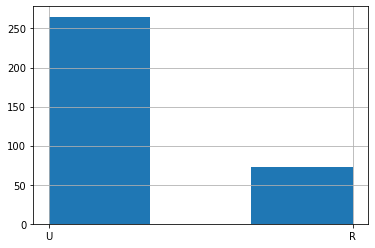

In [58]:
df.address.hist(bins = 3)
pivot = df.pivot_table(values=['score'],
index=['address'],
columns=['school'],
aggfunc='count', 
margins=True,
fill_value=0)
display(pivot)
df.address.describe()

В школе GP соотношение городских учеников выше, возможно она находится в более крупном городе.

#### Изучим колонку famsize

count     328
unique      2
top       GT3
freq      228
Name: famsize, dtype: object

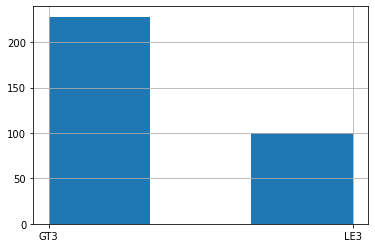

In [59]:
df.famsize.hist(bins = 3)
df.famsize.describe()

В большинстве семей более 1 ребёнка.

#### Изучим колонку Pstatus

count     311
unique      2
top         T
freq      277
Name: Pstatus, dtype: object

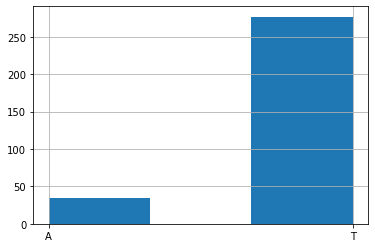

In [60]:
df.Pstatus.hist(bins = 3)
df.Pstatus.describe()

У большинства детей родители проживают совместно.

#### Изучим колонки Medu и Fedu

count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

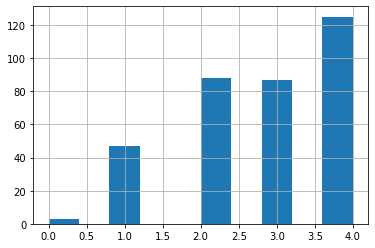

In [61]:
df.Medu.hist()
df.Medu.describe()

У большинства матерей высшее образование.

count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

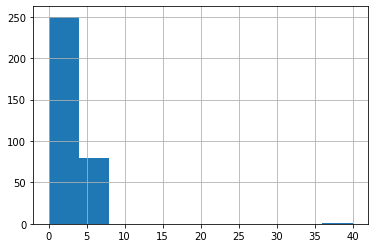

In [62]:
df.Fedu.hist()
df.Fedu.describe()

Видим недопустимое значение 40 в данной колонке. Возможно имеет место опечатка, заменим это значение пропуском.

In [63]:
df.Fedu.replace(40, np.nan, inplace=True)

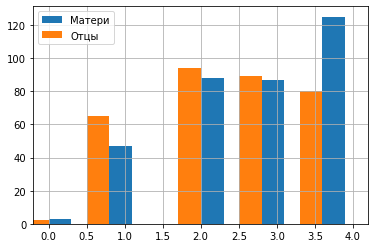

In [64]:
df.Medu.hist(width = 0.3, label = 'Матери')
df.Fedu.hist(width = -0.3, label = 'Отцы')
plt.legend()

Образование матерей и отцов сопоставимы.

#### Изучим колонки Mjob и Fjob

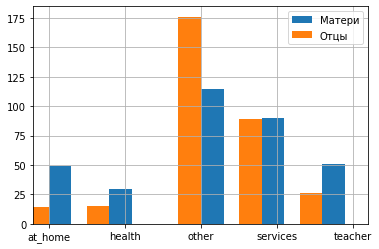

In [65]:
df.Mjob.hist(width = 0.3, label = 'Матери')
df.Fjob.hist(width = -0.3, label = 'Отцы')
plt.legend()

Женщины чаще встречаются среди домохозяек, профессий учителя и врача. Преимущественно мужские професии не выделены в отдельные категории.

#### Рассмотрим колонку reason

In [66]:
# по каким причинам выбирают ту или иную школу
pivot = df.pivot_table(values=['score'],
index=['reason'],
columns=['school'],
aggfunc='count', 
margins=True,
fill_value=0)
display(pivot)

score         
school        GP  MS  All
reason                   
course       103  16  119
home          80   9   89
other         25   8   33
reputation    92   4   96
All          300  37  337

    Похоже, что репутация школы MS оставляет желать лучшего - это самая редкая причина выбора данной школы. 
    Наиболее популярными причинами выбора школ являются их образовательные программы.

#### Рассмотрим колонку guardian

mother    225
father     78
other      20
Name: guardian, dtype: int64

<AxesSubplot:xlabel='guardian'>

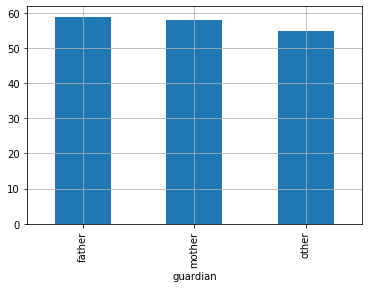

In [67]:
display(df.guardian.value_counts())
df.groupby(by = ['guardian'])['score'].mean().plot(kind = 'bar', grid= True)

Соотношение количества явно в пользу матерей, а вот на результат это похоже, что не влияет.

#### Изучим колонки traveltime и studytime

In [68]:
pivot = df.pivot_table(values=['score'],
index=['address'],
columns=['traveltime'],
aggfunc='count', 
margins=True,
fill_value=0)
display(pivot)
print('В среднем городские школьники добираются до дома не более чем за {} минуты'.format(round(df[df.address == 'U'].traveltime.mean()),0))
print('В среднем загородные школьники добираются до дома не более чем за {} минуты'.format(round(df[df.address == 'R'].traveltime.mean()),0))
df.traveltime.describe()

score                     
traveltime  15.0 30.0 60.0 120.0  All
address                              
R             32   22   10     4   68
U            181   59    7     3  250
All          213   81   17     7  318

В среднем городские школьники добираются до дома не более чем за 21 минуты
В среднем загородные школьники добираются до дома не более чем за 33 минуты


count    329.000000
mean      23.480243
std       18.086018
min       15.000000
25%       15.000000
50%       15.000000
75%       30.000000
max      120.000000
Name: traveltime, dtype: float64

Видим, что у городских жителей большинство детей добираются до школы в пределах 15 минут и почти все (96%) учеников тратят на дорогу не более получаса.

Рассмотрим затраты времени на учёбу.

In [69]:
pivot = df.pivot_table(values=['score'],
index=['address'],
columns=['studytime'],
aggfunc='mean', 
margins=False,
fill_value=0)
display(pivot)

score                                 
studytime     120.0      300.0      600.0      1200.0
address                                              
R          46.750000  50.517241  59.117647  66.666667
U          59.328358  56.678832  63.513514  62.222222

Наблюдается тенденция увеличения результатов в зависимости от затрачиваемого времени.

#### Изучим колонку failures
Рассмотрим её в разрезе, например, возраста:

In [70]:
pivot = df.pivot_table(values=['score'],
index=['age'],
columns=['failures'],
aggfunc='count', 
margins=True,
fill_value=0)
display(pivot)

score                 
failures   0.0 1.0 2.0 3.0  All
age                            
15          59   3   4   2   68
16          79   9   2   1   91
17          77   5   1   3   86
18          53  13   0   1   67
19           4   8   2   1   15
20           1   0   2   0    3
21           0   0   0   1    1
22           0   0   0   1    1
All        273  38  11  10  332

Фактор присутствует менее чем в 18% наблюдаемых случаев, т.е. большинство детей не сталкиваются с дополнительными жизненными трудностями.
Мы видим, что у детей с в возрасте свыше 20 лет присутствуют такие факторы, возможно они и стали причиной более позднего обучения в школе.

#### Рассмотрим колонку schoolsup

no     295
yes     48
Name: schoolsup, dtype: int64

<AxesSubplot:xlabel='schoolsup'>

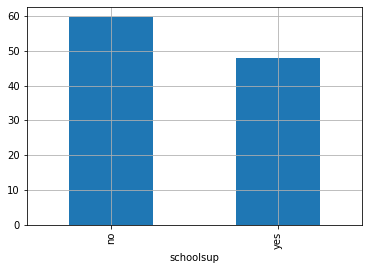

In [71]:
display(df.schoolsup.value_counts())
df.groupby(by = ['schoolsup'])['score'].mean().plot(kind = 'bar', grid= True)

Похоже, что школьная поддержка применяется как вынужденная мера для отстающих учеников, так как их средний бал заметно ниже.

#### Рассмотрим колонку famsup

yes    196
no     120
Name: famsup, dtype: int64

<AxesSubplot:xlabel='famsup'>

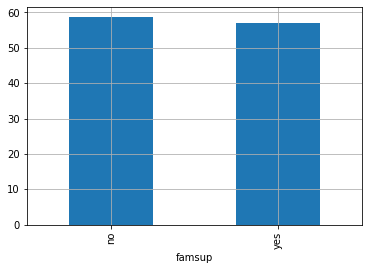

In [72]:
display(df.famsup.value_counts())
df.groupby(by = ['famsup'])['score'].mean().plot(kind = 'bar', grid= True)

По ней не заметно какого-либо влияния на результат.

#### Исследуем параметр paid

no     170
yes    146
Name: paid, dtype: int64

<AxesSubplot:xlabel='paid'>

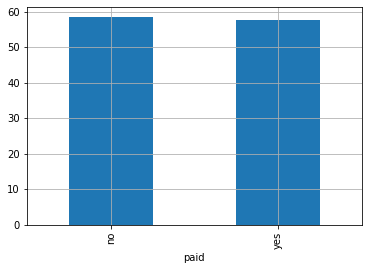

In [73]:
display(df.paid.value_counts())
df.groupby(by = ['paid'])['score'].mean().plot(kind = 'bar', grid= True)

Не похоже, чтобы этот параметр влиял на что-то.

Перейдём к параметру activities

yes    172
no     168
Name: activities, dtype: int64

<AxesSubplot:xlabel='activities'>

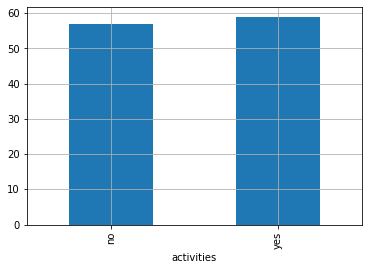

In [74]:
display(df.activities.value_counts())
df.groupby(by = ['activities'])['score'].mean().plot(kind = 'bar', grid= True)

Параметр не влияет на результат.

Рассмотрим параметр nursery:

yes    272
no      68
Name: nursery, dtype: int64

<AxesSubplot:xlabel='nursery'>

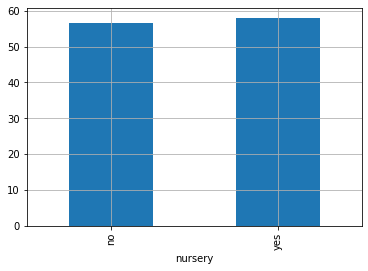

In [75]:
display(df.nursery.value_counts())
df.groupby(by = ['nursery'])['score'].mean().plot(kind = 'bar', grid= True)

Параметр не влияет на результат.

Рассмотрим параметр higher:

yes    320
no      13
Name: higher, dtype: int64

<AxesSubplot:xlabel='higher'>

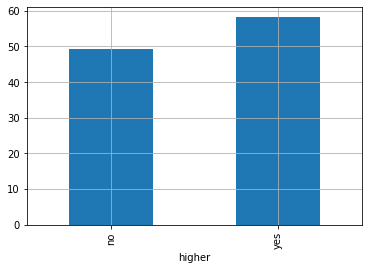

In [76]:
display(df.higher.value_counts())
df.groupby(by = ['higher'])['score'].mean().plot(kind = 'bar', grid= True)

Визуально заметно влияние данного параметра, при том, что "yes" ответили более 96% школьников.

Далее рассмотрим влияние параметра 
#### internet

yes    274
no      49
Name: internet, dtype: int64

<AxesSubplot:xlabel='internet'>

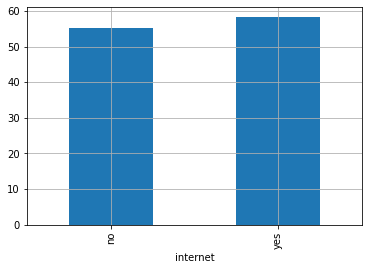

In [77]:
display(df.internet.value_counts())
df.groupby(by = ['internet'])['score'].mean().plot(kind = 'bar', grid= True)

Возможно присутствует незначительное положительное влияние, однако это может быть и косвенным признаком, например, большего достатка семьи.

Перейдём к рассмотрению параметра romantic

no     219
yes    104
Name: romantic, dtype: int64

<AxesSubplot:xlabel='romantic'>

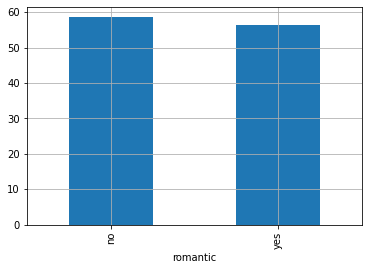

In [78]:
display(df.romantic.value_counts())
df.groupby(by = ['romantic'])['score'].mean().plot(kind = 'bar', grid= True)

Логично предположить, что наличие романтических отношений занимает мысли школьников, оставляя меньше места для математики, однако визуально разница мала и близка к статистической погрешности.

Рассмотрим параметр famrel

4.0    163
5.0     88
3.0     56
2.0     14
1.0      7
Name: famrel, dtype: int64

<AxesSubplot:xlabel='famrel'>

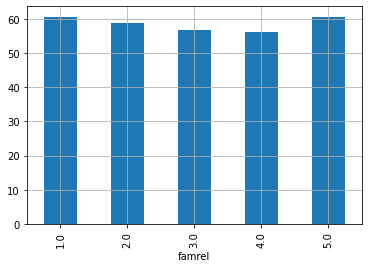

In [82]:
display(df.famrel.value_counts())
df.groupby(by = ['famrel'])['score'].mean().plot(kind = 'bar', grid= True)

In [81]:
# заменим выявленное недопустимое значение -1 на ближайший аналог 1
df.famrel = df.famrel.replace(-1, 1)

У большинства детей хорошие отношения в семье и это радует, но не даёт чёткого вектора влияния на результат экзамена. Можно предположить, что лучше учатся дели или с очень хорошими отношениями в семье, где поощряют их стремление учиться или в семьях с очень плохими отношениями, где школьник либо проводит больше времени за уроками, так как это лучший вариант времяпровождения, либо его строго заставляют учиться, однако разница невелика и близка к статистической погрешности, в т.ч. ввиду малой выборки детей с низким показателем отношений.

Рассмотрим парметры freetime и goout

3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

<AxesSubplot:xlabel='freetime'>

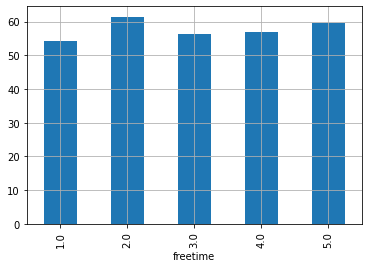

In [83]:
display(df.freetime.value_counts())
df.groupby(by = ['freetime'])['score'].mean().plot(kind = 'bar', grid= True)

У большинства школьников достаточно свободного времени. Влияние параметра на результат если есть, то оно нелинейное.

3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

<AxesSubplot:xlabel='goout'>

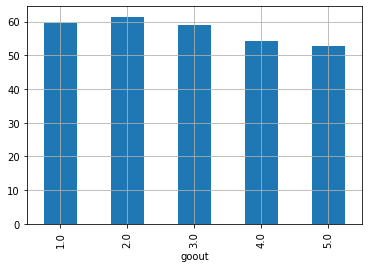

In [84]:
display(df.goout.value_counts())
df.groupby(by = ['goout'])['score'].mean().plot(kind = 'bar', grid= True)

Есть тенденция, что чем больше школьники встречаются с друзьями, тем хуже они сдают экзамены, т.е. встречаются они явно не для совместных занятий математикой.

Рассмотрим параметр health

5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

<AxesSubplot:xlabel='health'>

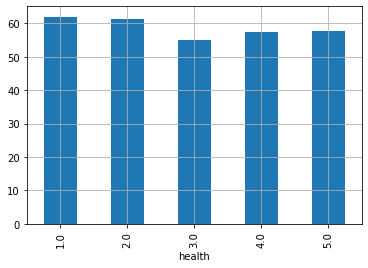

In [85]:
display(df.health.value_counts())
df.groupby(by = ['health'])['score'].mean().plot(kind = 'bar', grid= True)

Как ни странно, но лучшие показатели на экзаменах у школьников с худшим здоровьем. Возможно это из-за того, что менее здоровые школьники меньше гуляют с друзьями, что как мы помним приводит к ухудшению результатов на экзамене. 

Рассмотрим параметр absences

<AxesSubplot:title={'center':'Пропуски занятий и результаты экзамена'}, xlabel='absences', ylabel='score'>

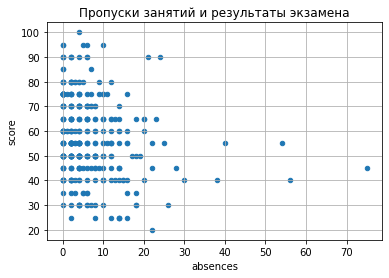

In [88]:
df.plot(x = 'absences', 
       y = 'score',
       kind = 'scatter',
       grid = True,
       title = 'Пропуски занятий и результаты экзамена')

Разовые пропуски сотен учебных дней не вызывают доверия и похожи на ошибки. Очистим выборку от строк со школьниками, фактически учившимися экстерном.

Заново запустим предудущую ячейку для отображения обновлённого графика.
Среди учеников с большим количеством пропусков чаще встречаются более низкие результаты экзамена.

In [87]:
df = df.loc[df['absences'] < 100]

In [89]:
# Используем для наглядности матрицу корреляций:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.123908,-0.123699,0.062843,-0.024648,0.216688,0.000084,0.054775,-0.008774,0.111546,-0.056549,0.211007,-0.126372
Medu,-0.123908,1.000000,0.620502,-0.185392,0.046363,-0.202471,-0.061753,-0.007856,0.007917,0.066202,-0.050909,0.073974,0.183137
Fedu,-0.123699,0.620502,1.000000,-0.158537,-0.060440,-0.268086,0.029467,-0.017049,-0.028293,0.036811,0.014191,0.031280,0.126758
traveltime,0.062843,-0.185392,-0.158537,1.000000,-0.055566,0.119647,0.083580,-0.027674,0.012247,0.063976,0.023969,-0.019305,-0.078955
studytime,-0.024648,0.046363,-0.060440,-0.055566,1.000000,-0.141312,-0.951394,0.038463,-0.128445,-0.026730,-0.086074,-0.083763,0.153663
failures,0.216688,-0.202471,-0.268086,0.119647,-0.141312,1.000000,0.154357,-0.006982,0.120116,0.126289,0.061929,0.136301,-0.281811
"studytime, granular",0.000084,-0.061753,0.029467,0.083580,-0.951394,0.154357,1.000000,-0.058024,0.131224,0.030404,0.090933,0.078282,-0.141472
famrel,0.054775,-0.007856,-0.017049,-0.027674,0.038463,-0.006982,-0.058024,1.000000,0.158252,0.036312,0.103881,-0.063147,0.066692
freetime,-0.008774,0.007917,-0.028293,0.012247,-0.128445,0.120116,0.131224,0.158252,1.000000,0.296922,0.056405,-0.081612,-0.015297
goout,0.111546,0.066202,0.036811,0.063976,-0.026730,0.126289,0.030404,0.036312,0.296922,1.000000,0.002182,0.044601,-0.202971


Наблюдаем достаточно сильную корреляцию (более 0.6) между образованием отца и матери - похоже, что люди часто выбирают себе пару со схожим уровнем образования, возможно из схожего социального слоя.
Чем лучше образование у родителей, тем меньше неудач у школьника и лучше оценки на экзамене.

Видим корреляцию -0.95 (и даже -1, если предварительно не обрабатывать колонку) параметров studytime и неописанного параметра studytime, granular - всвязи с данным обстоятельством можем удалить колонку studytime, granular как бесполезную и не тратить время и ресурсы на исследование этих данных.

Есть несильная взаимосвязь 0.296 в количестве свободного времени и времени, проводимого с друзьями.

У показателя failures (количества внеучебных неудач) наблюдается возможная взаимосвясь с несколькими показателями: возраст, образование отца/матери, а также этот показатель сильнее остальных связан с ключевым показателем score.

Похоже, что чем взослее школьник, тем выше вероятность прогула уроков.

In [90]:
# удаляем колонку 'studytime, granular'
df.drop(['studytime, granular'], inplace = True, axis = 1)

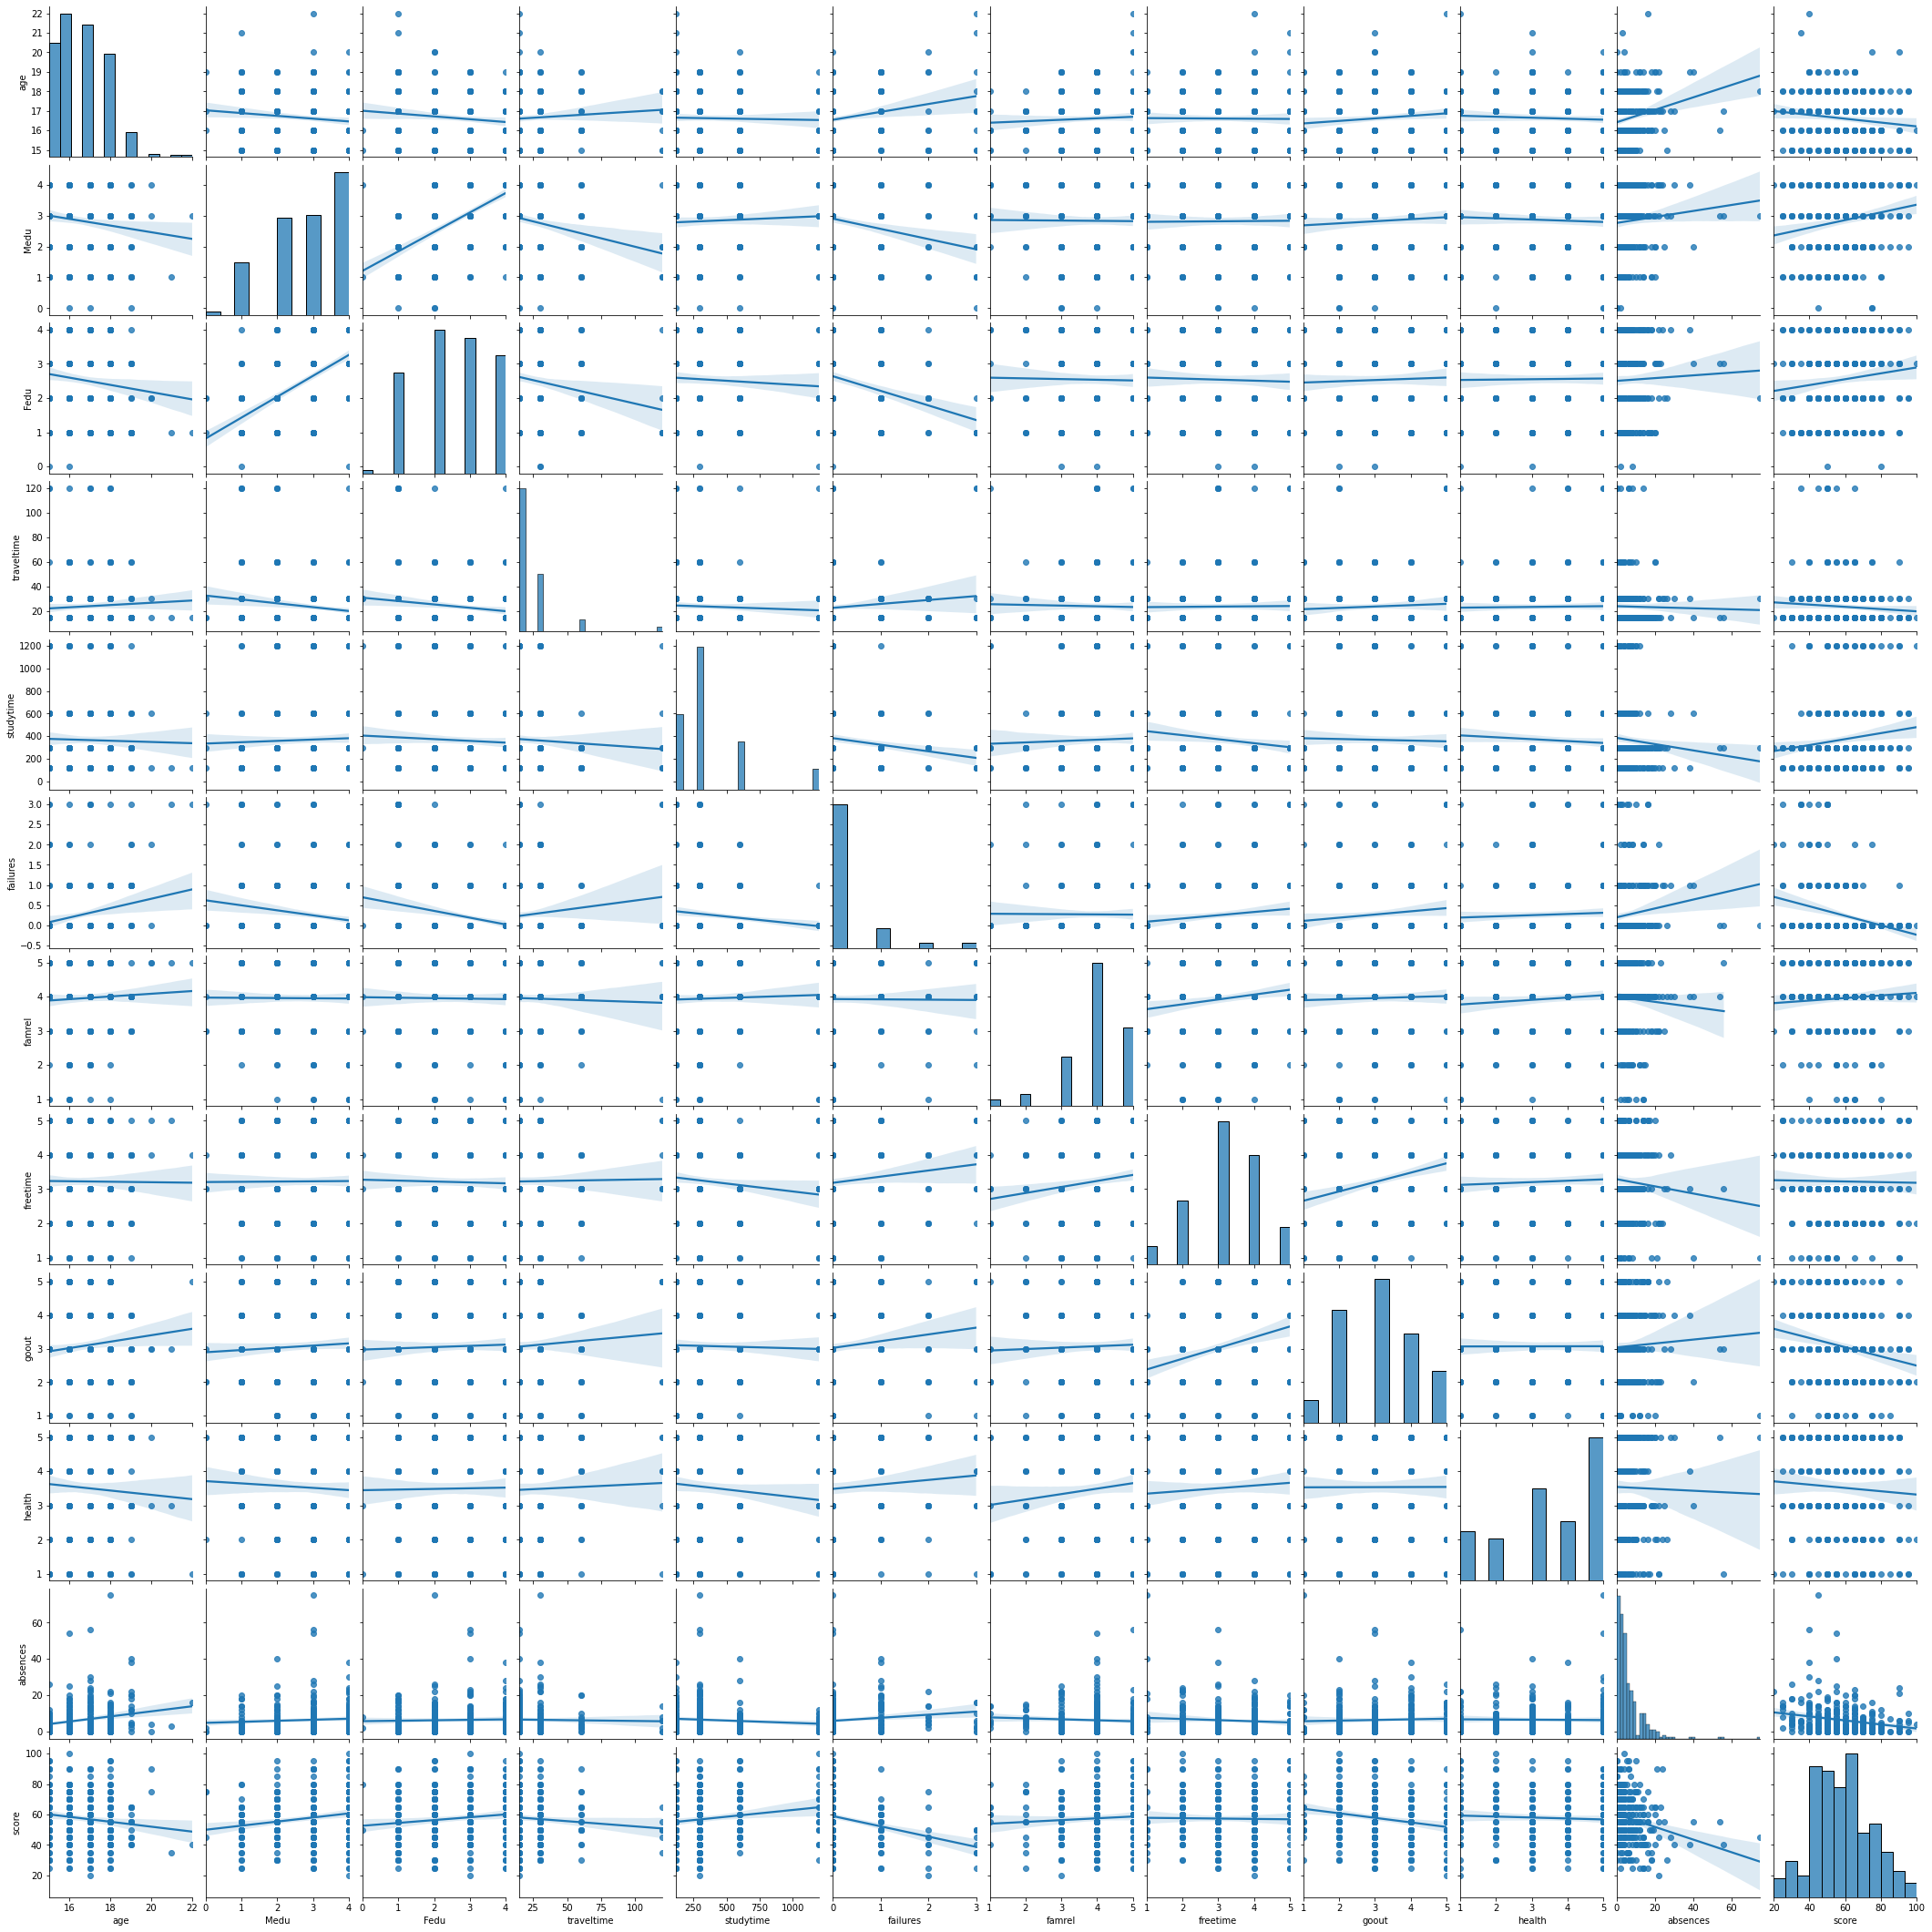

In [93]:
# построим графики зависимостей и линии тренда для всех числовых параметров, функция выполняетяс немного дольше остальных, придётся подождать.
sns.pairplot(df, kind = 'reg')
# замечаем ярко выраженные тренды между некоторыми показателями, например возрастом и прогулами, прогулами и неудачами, образованием матери и отца и пр.

In [92]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

Построим коробки с усами, чтобы визуально оценить влияние параметров на итоговый результат экзамена

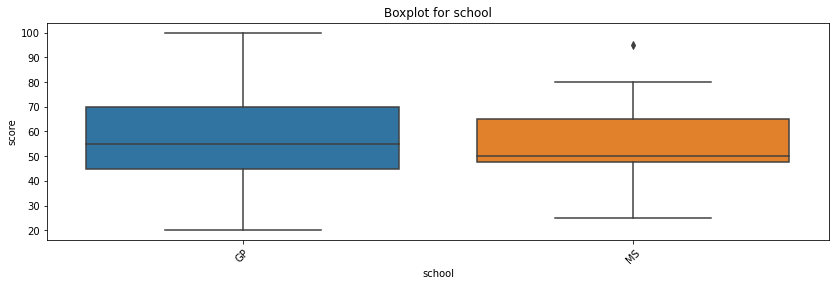

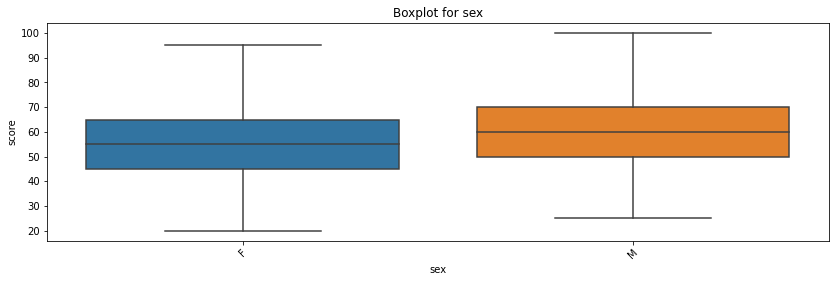

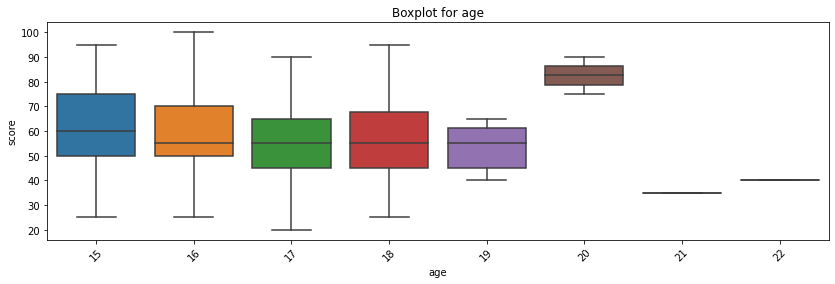

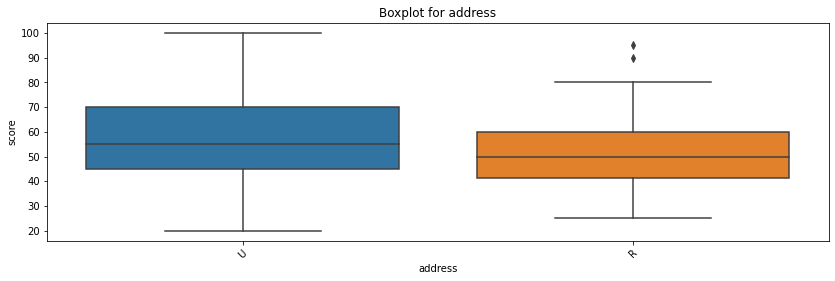

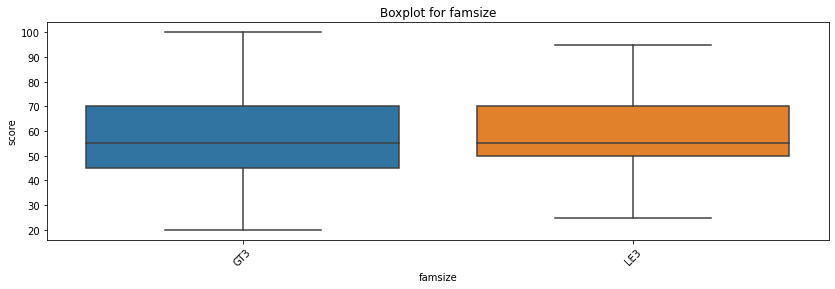

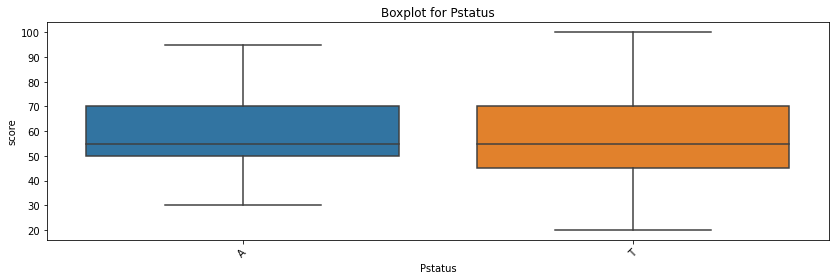

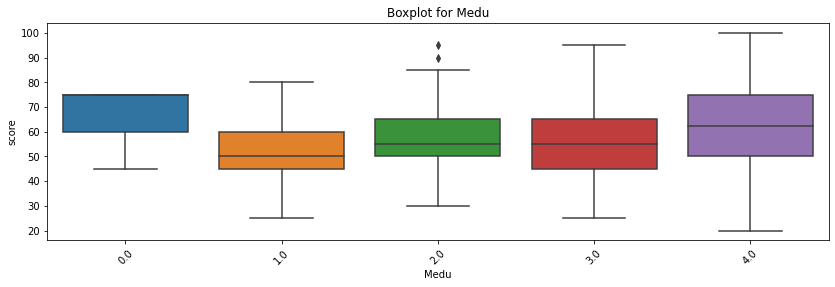

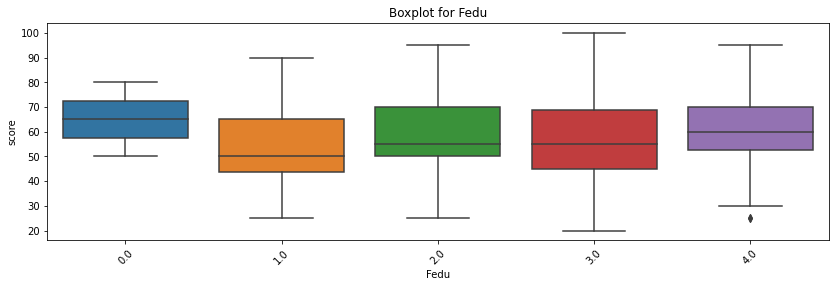

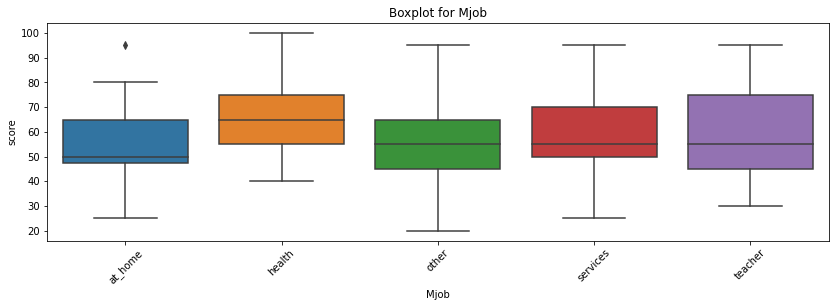

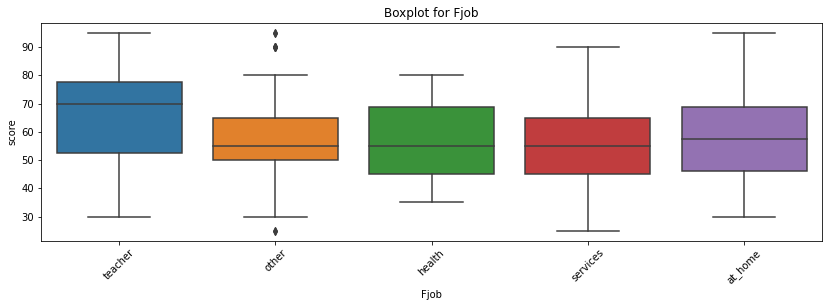

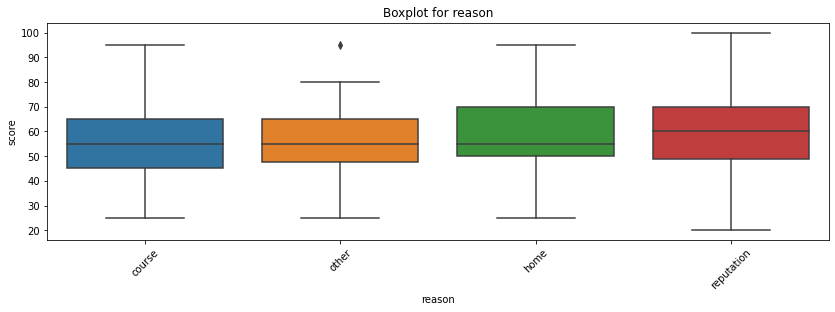

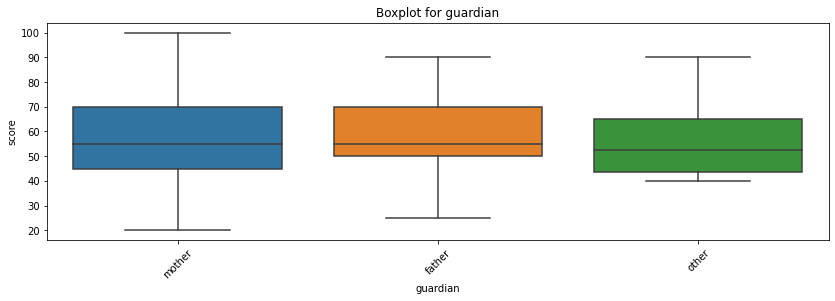

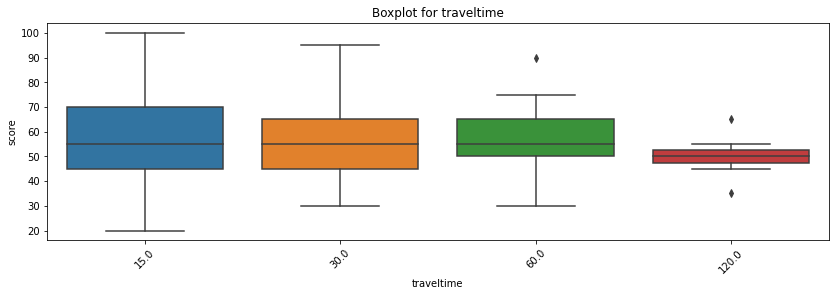

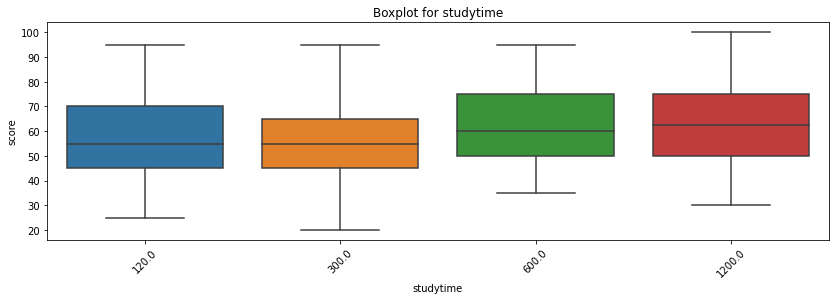

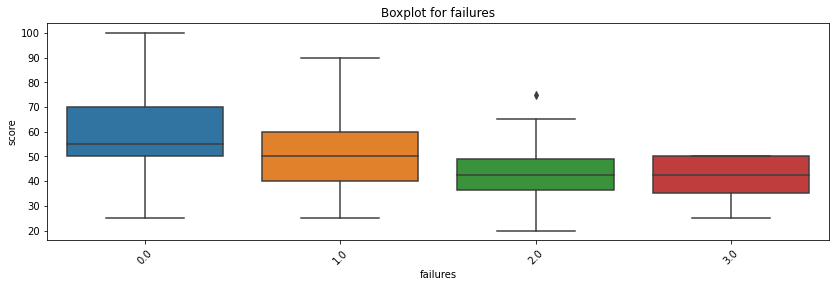

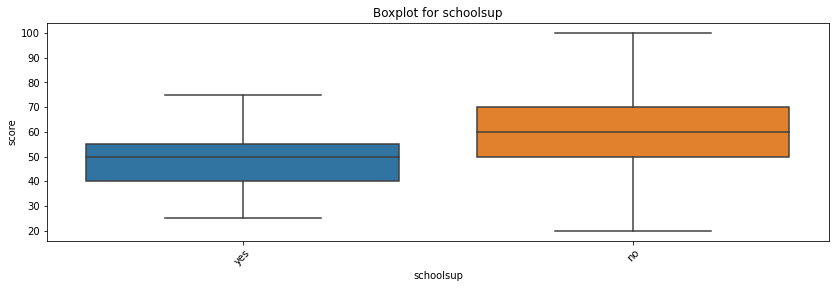

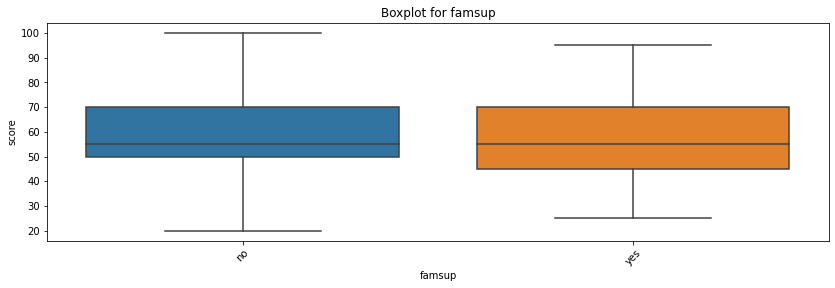

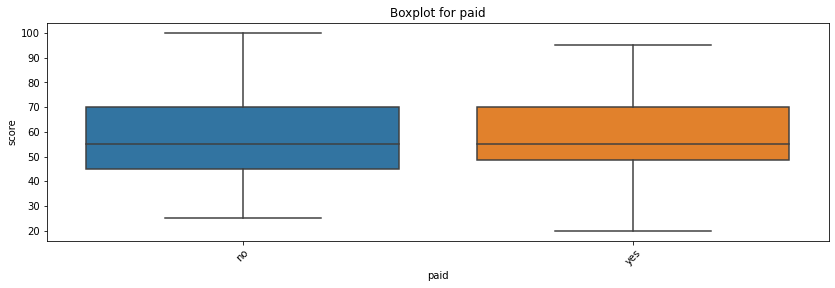

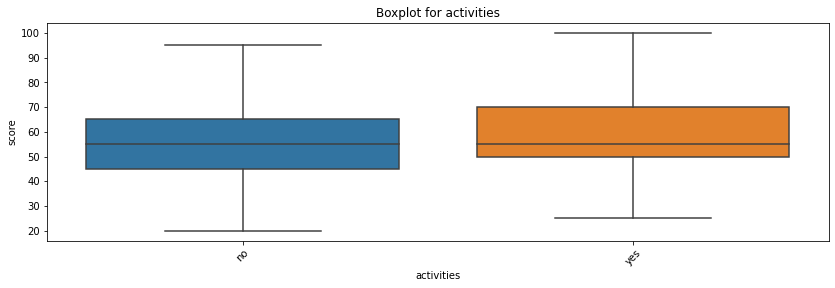

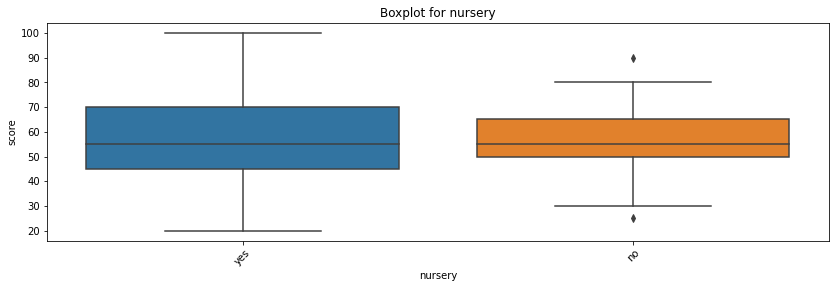

KeyError: 'studytime, granular'

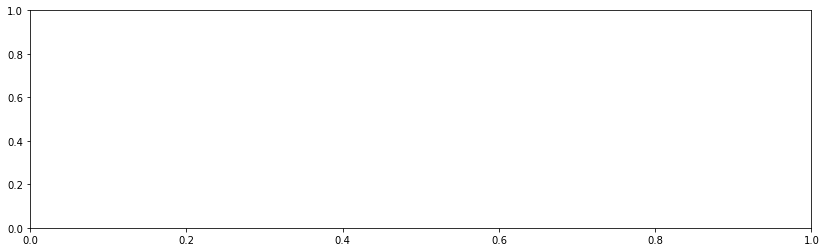

In [94]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    get_boxplot(col)

Визуальные наблюдения говорят о том, что наблюдается зависимость итогового результата score от следующих параметров:\
        + school\
        + sex\
        + age\
        + address\
        + Medu\
        + Fedu\
        + Mjob\
        + Fjob\
        + reputation\
        + reason\
        + guardian\
        + traveltime\
        + studytime\
        + failures\
        + schoolsup\
        + higher\
        + internet\
        + romantic\
        + freetime\
        + goout\
        + absences
    
Не заметна зависимость результата score от следующих параметров:\
        - famsize\
        - Pstatus\
        - famsup\
        - paid\
        - activities\
        - nursery\
        - famrel\
        - health

C помощью теста Стьюдента проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по математике по различным параметрам неразличимы:

In [95]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
p-value 0.053971605028382615
Найдены статистически значимые различия для колонки age
p-value 0.0007653519200982055
Найдены статистически значимые различия для колонки address
p-value 0.005010082541463571
Найдены статистически значимые различия для колонки Medu
p-value 0.0003722654834131629
Найдены статистически значимые различия для колонки Fedu
p-value 0.00599737554390732
Найдены статистически значимые различия для колонки Mjob
p-value 0.0014562353567073496
Найдены статистически значимые различия для колонки studytime
p-value 0.0011662463208278158
Найдены статистически значимые различия для колонки failures
p-value 0.002543671055275803
Найдены статистически значимые различия для колонки schoolsup
p-value 1.6514440134603972e-06
Найдены статистически значимые различия для колонки goout
p-value 0.0023092341354760304
Найдены статистически значимые различия для колонки absences
p-value 0.0011240118988551696


Визуальные обзор графиков обратил наше внимание на 21 параметр.
Расчёт t-критерия при 90% уровне доверия подтвердил 12 параметров.
Итого перед основным исследованием наш датасет примет следующий вид:

In [96]:
df_for_model = df.loc[:, ['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'higher', 'goout', 'absences']]
df_for_model.head()

,sex,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,goout,absences
0,F,U,4.0,4.0,at_home,teacher,300.0,0.0,yes,yes,4.0,6.0
1,F,U,1.0,1.0,at_home,other,300.0,0.0,no,yes,3.0,4.0
2,F,U,1.0,1.0,at_home,other,300.0,3.0,yes,yes,2.0,10.0
3,F,U,4.0,2.0,health,NaN,600.0,0.0,no,yes,2.0,2.0
4,F,U,3.0,3.0,other,other,300.0,0.0,no,yes,2.0,4.0


Итак, в результате EDA для анализа влияния различных факторов на количество баллов, набираемых учениками на госэкзамене по математике были получены следующие выводы:

Без последствий для точности анализа по причине её близкой к -1 корреляции с колонкой studytime мы смогли удалить не обозначенную в исходных данных колонку "studytime, granular".

В данных достаточно мало пустых значений, хоть и пришлось исключить из выборки более 10% строк из-за отсутствия значений в итоговой колонке score.

Распределение детей по возрасту неравномерное, детей в возрасте 15-18 лет существенно больше, чем более взрослых.

Похоже, что большинство школьников заканчивают обучение примерно в 18 лет.

Похоже, что в школе MS статистику начали собирать недавно и предоставили данные только по одному последнему выпускному классу.

Похоже, что репутация школы MS оставляет желать лучшего - это самая редкая причина выбора данной школы. 

В школе GP соотношение городских учеников выше, возможно она находится в более крупном городе.

Наиболее популярными причинами выбора школ являются их образовательные программы.

В среднем городские школьники добираются до дома не более чем за 21 минуты

В среднем загородные школьники добираются до дома не более чем за 33 минуты

Видим, что у городских жителей большинство детей добираются до школы в пределах 15 минут и почти все (96%) учеников тратят на дорогу не более получаса.

Наблюдается тенденция увеличения баллов в итоговом тесте в зависимости от затрачиваемого времени на учёбу помимо школы.

В большинстве семей более 1 ребёнка.

У большинства детей родители проживают совместно.

У большинства матерей высшее образование.

Образование матерей и отцов сопоставимы.

Женщины чаще встречаются среди домохозяек, профессий учителя и врача. Преимущественно мужские професии не выделены в отдельные категории.

Большинство детей не сталкиваются с дополнительными жизненными трудностями, однако их наличие пагубно влияет на результаты экзамена. Мы видим, что у детей с в возрасте свыше 20 лет присутствуют такие факторы, возможно они и стали причиной более позднего обучения в школе.

Похоже, что школьная поддержка применяется как вынужденная мера для отстающих учеников, так как их средний бал заметно ниже.

Наблюдаем достаточно сильную корреляцию (более 0.6) между образованием отца и матери - похоже, что люди часто выбирают себе пару со схожим уровнем образования, возможно из схожего социального слоя.

Есть несильная взаимосвязь 0.296 в количестве свободного времени и времени, проводимого с друзьями.

У показателя failures (количества внеучебных неудач) наблюдается возможная взаимосвясь с несколькими показателями: возраст, образование отца/матери, а также этот показатель сильнее остальных связан с ключевым показателем score.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'higher', 'goout' и 'absences'.